In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style = "whitegrid", palette = "pastel") 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder, CatBoostEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
import xgboost as xg 
import lightgbm as lgb 

In [5]:
data = pd.read_csv('data/x.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns too
pd.set_option("display.max_columns", None)

In [5]:
data = pd.read_csv('Cleaned_global_data.csv')

In [5]:
data.shape

(197471, 43)

In [6]:
data.head(10)

,year,month,day,extended_event,country,region,province_state,city,vicinity_area,criteria_political,criteria_economic,criteria_religious,multiple_attacks,successful_attack,suicide_attack,primary_attack_type,primary_target_type,primary_target_subtype,target_nationality,secondary_target_type,group_name,individual_attack,attack_claimed,claim_mode,primary_weapon_type,secondary_weapon_type,secondary_weapon_subtype,num_killed,num_killed_us,num_killed_terrorists,num_wounded,num_wounded_us,num_wounded_terrorists,property_damage,property_extent_code,property_extent,property_value,hostage_incident,ransom_demanded,hostage_outcome_code,hostage_outcome,num_released,month_name
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,National,Santo Domingo,0,1,1,1,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,Unknown,MANO-D,0,0.0,Unknown,Unknown,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,July
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,0,1,1,1,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,Unknown,23rd of September Communist League,0,0.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,1.0,1.0,Unknown,Unknown,0.0,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,0,1,1,1,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,0,0.0,Unknown,Unknown,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,0,1,1,1,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,0,1,1,1,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Unknown,0,0.0,Unknown,Incendiary,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
5,1970,1,1,0,United States,North America,Illinois,Cairo,0,1,1,1,0.0,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",United States,Unknown,Black Nationalists,0,0.0,Unknown,Firearms,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,0.0,0.0,Unknown,Unknown,0.0,January
6,1970,1,2,0,Uruguay,South America,Montevideo,Montevideo,0,1,1,1,0.0,0,0,Assassination,Police,Police Security Forces/Officers,Uruguay,Unknown,Tupamaros (Uruguay),0,0.0,Unknown,Firearms,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
7,1970,1,2,0,United States,North America,California,Oakland,0,1,1,1,0.0,1,0,Bombing/Explosion,Utilities,Electricity,United States,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),22500.0,0.0,0.0,Unknown,Unknown,0.0,January
8,1970,1,2,0,United States,North America,Wisconsin,Madison,0,1,1,1,0.0,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,United States,Unknown,New Year's Gang,0,1.0,Letter,Incendiary,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),60000.0,0.0,0.0,Unknown,Unknown,0.0,January
9,1970,1,3,0,United States,North America,Wisconsin,Madison,0,1,1,1,0.0,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,United States,Unknown,New Year's Gang,0,0.0,Unknown,Incendiary,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,0.0,0.0,Unknown,Unknown,0.0,January


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197471 entries, 0 to 197470
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   year                      197471 non-null  int64  
 1   month                     197471 non-null  int64  
 2   day                       197471 non-null  int64  
 3   extended_event            197471 non-null  int64  
 4   country                   197471 non-null  object 
 5   region                    197471 non-null  object 
 6   province_state            197471 non-null  object 
 7   city                      197471 non-null  object 
 8   vicinity_area             197471 non-null  int64  
 9   criteria_political        197471 non-null  int64  
 10  criteria_economic         197471 non-null  int64  
 11  criteria_religious        197471 non-null  int64  
 12  multiple_attacks          197471 non-null  float64
 13  successful_attack         197471 non-null  i

## Dropping Unnecessary Columns

In [7]:
drop_list = [
 'day',
 'month_name',
 'property_extent',
 'hostage_outcome',
 'num_killed_us',
 'num_wounded_us',
 'num_wounded_terrorists',
 'num_killed_terrorists',
 'num_released',
 'property_value',
 'hostage_outcome_code',
 'property_extent_code'
 
]

data.drop(drop_list, axis = 1, inplace = True)

In [8]:
data.duplicated().sum()

np.int64(3540)

In [9]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

np.int64(0)

## Displaying Categorical Features

In [10]:
cat_cols = data.select_dtypes(include = 'object').columns
for col in cat_cols:
    print(f'{col} ({len(data[col].unique())})', ':')
    print(data[col].unique())
    print(70 * '_')

country (204) :
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'Brunei' 'Zaire' "People's Republic of the Congo" 'Portugal'
 'Algeria' 'El Salvador' 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus'
 'Myanmar' 'Afghanistan' 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador'
 'New Zealand' 'Malaysia' 'Singapore' 'Botswana' 'Jamaica' 'Chad'
 'North Yemen' 'Andorra' 'Syria' 'South Korea' 'United Arab Emirates'
 'South Africa' 'Kenya' 'Iraq' 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia'
 '

In [ ]:
# label = [ "region", "primary_attack_type", "claim_mode", "primary_weapon_type", "secondary_weapon_type"]
# target = [ "country", "province_state", "city", "primary_target_type", "primary_target_subtype", "target_nationality", "secondary_target_type", "group_name", "secondary_weapon_subtype"]

# le = LabelEncoder()
# for col in label:
#     data[col] = le.fit_transform(data[col])

In [13]:
data.head()

,year,month,extended_event,country,region,province_state,city,vicinity_area,criteria_political,criteria_economic,criteria_religious,multiple_attacks,successful_attack,suicide_attack,primary_attack_type,primary_target_type,primary_target_subtype,target_nationality,secondary_target_type,group_name,individual_attack,attack_claimed,claim_mode,primary_weapon_type,secondary_weapon_type,secondary_weapon_subtype,num_killed,num_wounded,property_damage,hostage_incident,ransom_demanded
0,1970,7,0,Dominican Republic,Central America & Caribbean,National,Santo Domingo,0,1,1,1,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,Unknown,MANO-D,0,0.0,Unknown,Unknown,Unknown,Unknown,1.0,0.0,0,0.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,0,1,1,1,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,Unknown,23rd of September Communist League,0,0.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0,1.0,1.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,0,1,1,1,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,0,0.0,Unknown,Unknown,Unknown,Unknown,1.0,0.0,0,0.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,0,1,1,1,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,1,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,0,1,1,1,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Unknown,0,0.0,Unknown,Incendiary,Unknown,Unknown,0.0,0.0,1,0.0,0.0


## Correlation Matrix

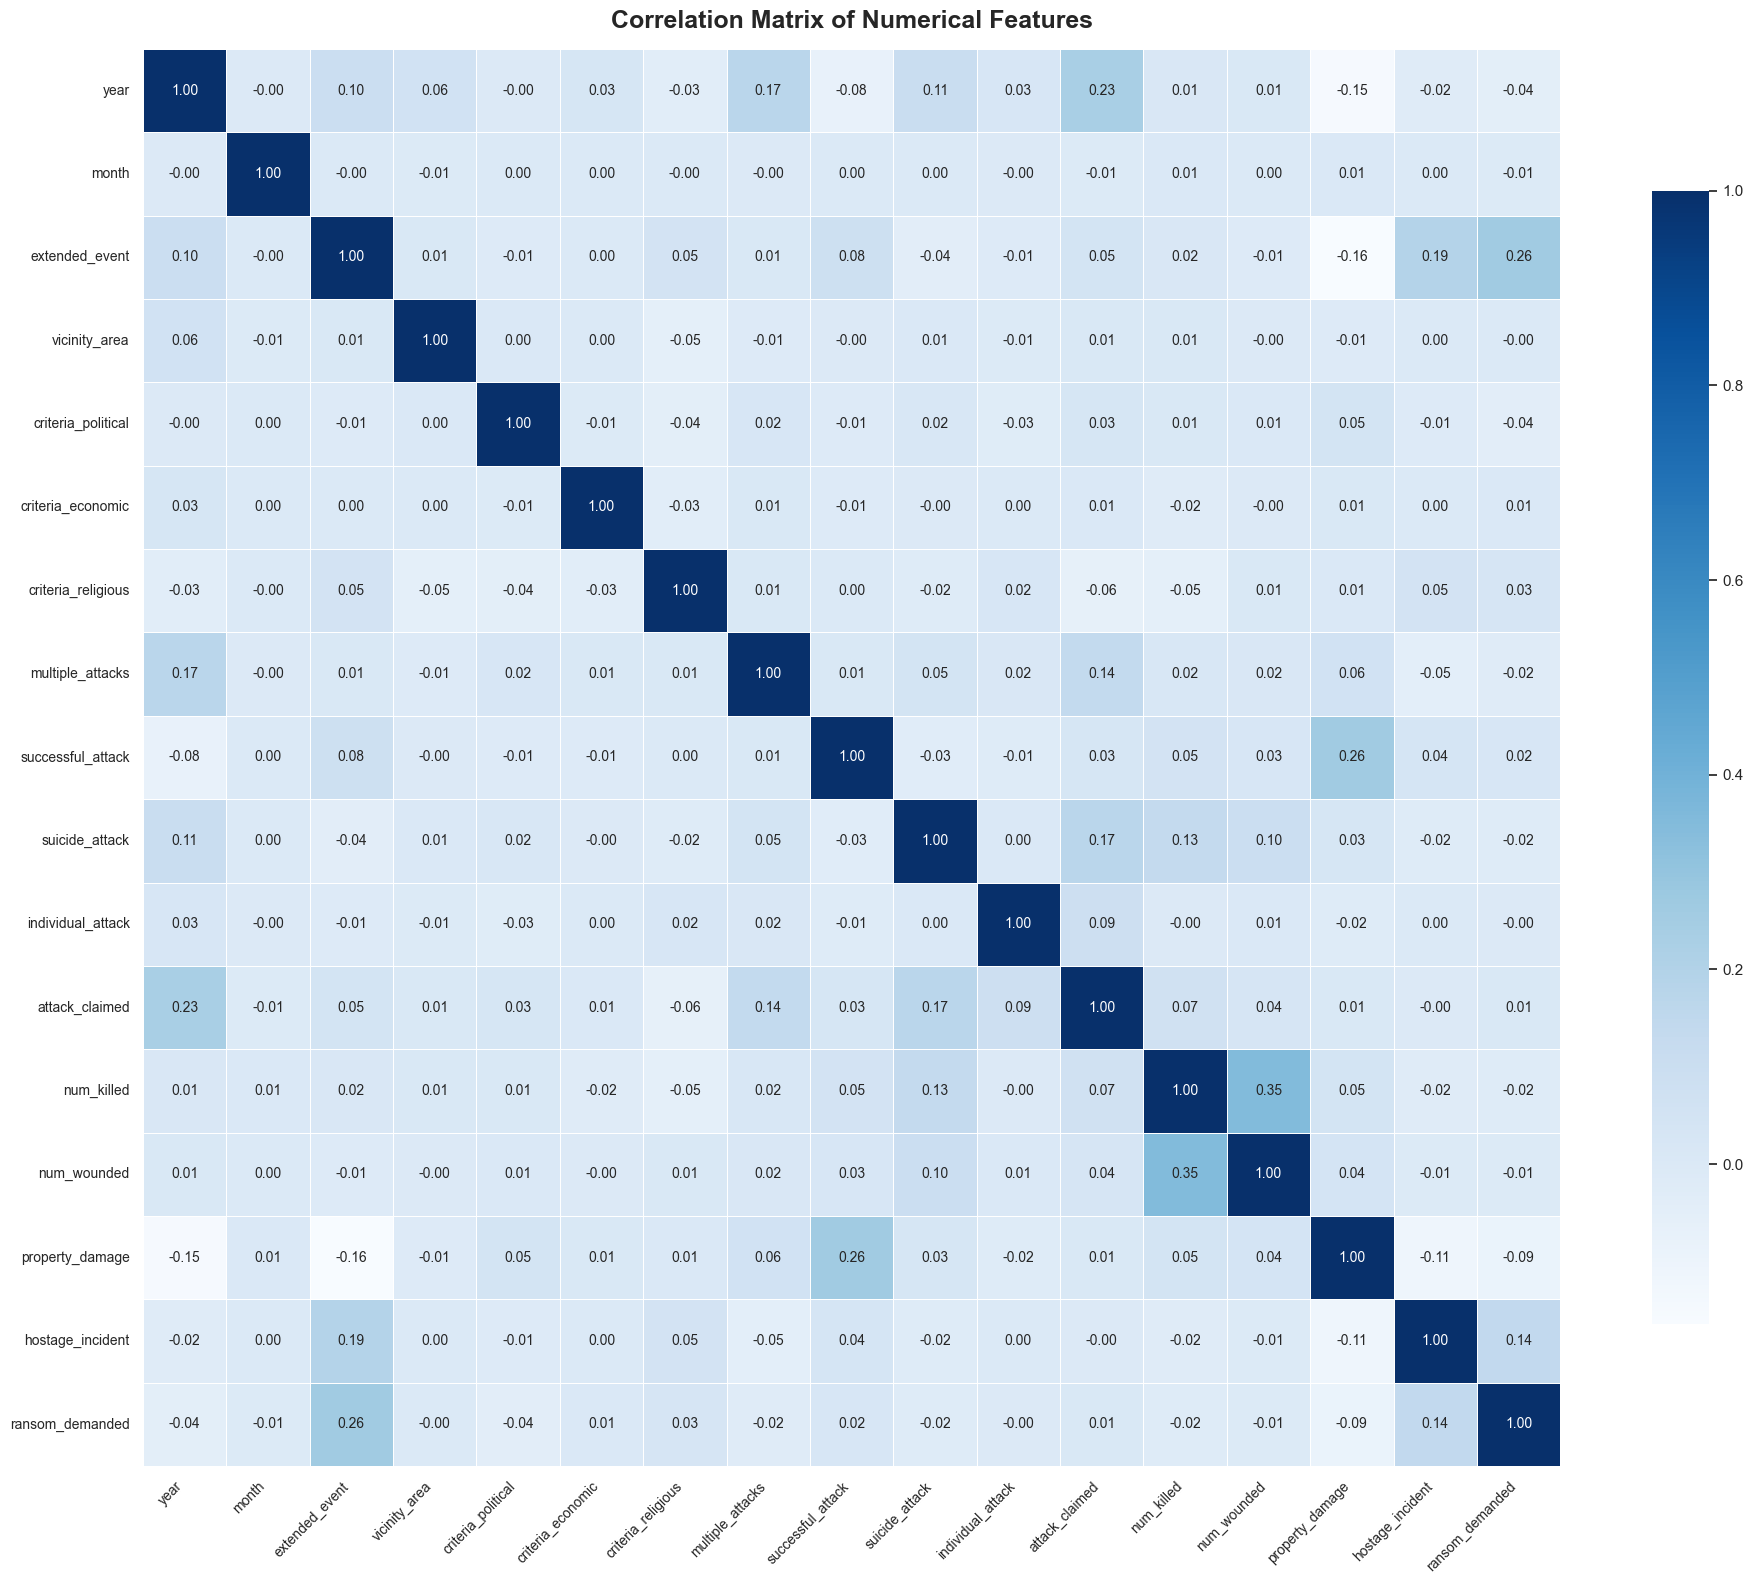

In [11]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight='bold', pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

---

# **Terror Attack Success Prediction Model**
The Terror Attack Success Prediction Model (TASPM) is designed to predict the likelihood that a planned terrorist attack will successfully achieve its intended objective. By analyzing historical patterns in attack method, target type, location, and perpetrator characteristics, the model anticipates operational success before an attack unfolds. This enables analysts to identify high-risk threats and better understand which factors contribute to successful terrorist operations on a global scale.

One of the most significant benefits of TASPM lies in its contribution to proactive security intelligence. Instead of reacting to events after they occur, security agencies, researchers, and counter-terrorism teams can use this model to forecast dangerous situations and allocate resources more strategically. The model offers a data-driven approach for improving surveillance, strengthening defenses in vulnerable areas, and enhancing situational awareness for policymakers and law enforcement.

Beyond direct security applications, TASPM provides valuable analytical insights that support academic research, government decision-making, and international counter-terrorism strategies. It helps uncover behavioral and logistical patterns—such as the impact of target type, geography, or attack strategy on success rates—offering a deeper understanding of global terrorism dynamics. This knowledge not only enhances risk-assessment models and crisis-intervention planning but also contributes to designing more effective prevention programs and long-term stability policies.

## Distribution of Successful Attacks

In [ ]:
data['successful_attack'].value_counts()

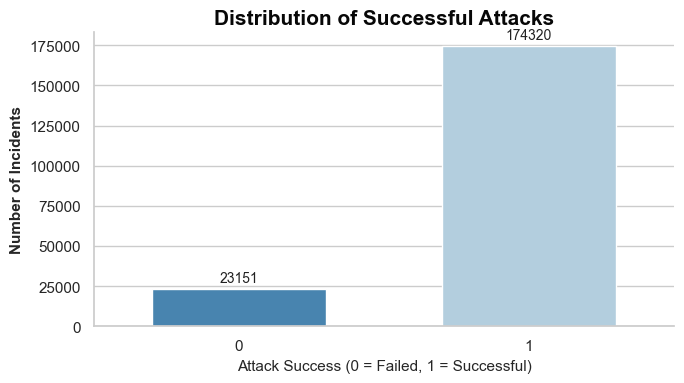

In [8]:
plt.figure(figsize=(7, 4))

ax = sns.countplot(
    data=data,
    x='successful_attack',
    palette='Blues_r',
    width=0.6
)

plt.title('Distribution of Successful Attacks', fontsize=15, weight='bold', color="#070707")
plt.xlabel('Attack Success (0 = Failed, 1 = Successful)', fontsize=11)
plt.ylabel('Number of Incidents', fontsize=11, weight='bold')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, color='#222222')

# Aesthetic adjustments
sns.despine()
plt.tight_layout()
plt.show()

The extreme class imbalance evident in the plot presents a significant challenge for any predictive modeling task, as the successful attack class (Class 1) dramatically outweighs the failed attack class (Class 0), with $174,064$ incidents compared to only $23,113$.      
This means that a standard machine learning model trained on this data would likely develop a strong bias toward the majority class, potentially achieving a high, yet misleading, overall accuracy simply by frequently or always predicting 'Successful Attack.'    

## Handeling Imbalanced Data

In [9]:
class1 = data[data['successful_attack'] == 1]
class0 = data[data['successful_attack'] == 0]

In [15]:
class1.shape

(171190, 31)

In [16]:
class0.shape

(22741, 31)

In [17]:
class1 = class1.sample(n = 24000, random_state = 0)

In [18]:
balanced_data = pd.concat([class0, class1]).sample(frac=1).reset_index(drop=True)

In [19]:
balanced_data.head(20)

,year,month,extended_event,country,region,province_state,city,vicinity_area,criteria_political,criteria_economic,criteria_religious,multiple_attacks,successful_attack,suicide_attack,primary_attack_type,primary_target_type,primary_target_subtype,target_nationality,secondary_target_type,group_name,individual_attack,attack_claimed,claim_mode,primary_weapon_type,secondary_weapon_type,secondary_weapon_subtype,num_killed,num_wounded,property_damage,hostage_incident,ransom_demanded
0,2014,6,0,Philippines,Southeast Asia,Nueva Vizcaya,Bagabag,0,1,1,1,0.0,1,0,Assassination,Government (General),Politician or Political Party Movement/Meeting...,Philippines,Unknown,Unknown,0,0.0,Unknown,Firearms,Unknown,Unknown,1.0,0.0,0,0.0,0.0
1,1991,8,0,United Kingdom,Western Europe,Northern Ireland,Lurgan,0,1,0,1,0.0,1,0,Armed Assault,Terrorists/Non-State Militia,Terrorist,Northern Ireland,Unknown,Unknown,0,0.0,Unknown,Firearms,Unknown,Unknown,0.0,3.0,1,0.0,0.0
2,2016,6,0,Sudan,Sub-Saharan Africa,South Darfur,Unknown,0,1,1,1,0.0,1,0,Armed Assault,Religious Figures/Institutions,Religious Figure,Sudan,Unknown,Unknown,0,0.0,Unknown,Firearms,Unknown,Unknown,1.0,0.0,1,0.0,0.0
3,1991,4,0,India,South Asia,Delhi,New Delhi,0,1,1,1,0.0,1,0,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square,India,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,1.0,0.0,1,0.0,0.0
4,2012,4,0,Afghanistan,South Asia,Kandahar,Spin Boldak district,0,1,1,1,0.0,0,0,Bombing/Explosion,Unknown,Unknown,Unknown,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,8.0,0.0,0,0.0,0.0
5,2019,7,0,Yemen,Middle East & North Africa,Al Hudaydah,At Tuhayta district,0,1,1,1,0.0,0,0,Armed Assault,Terrorists/Non-State Militia,Non-State Militia,Yemen,Unknown,Houthi extremists (Ansar Allah),0,0.0,Unknown,Firearms,Unknown,Unknown,0.0,0.0,0,0.0,0.0
6,2008,9,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,0,1,1,1,0.0,1,0,Armed Assault,Terrorists/Non-State Militia,Non-State Militia,Iraq,Unknown,Mahdi Army,0,0.0,Unknown,Firearms,Unknown,Unknown,3.0,0.0,1,0.0,0.0
7,2016,5,0,Iraq,Middle East & North Africa,Al Anbar,Amiriyat al-Fallujah,1,1,1,0,0.0,0,1,Bombing/Explosion,Military,Military Checkpoint,Iraq,Unknown,Islamic State of Iraq and the Levant (ISIL),0,0.0,Unknown,Explosives,Unknown,Unknown,5.0,0.0,1,0.0,0.0
8,2019,2,0,Afghanistan,South Asia,Herat,Pashtun Zarghun district,0,1,1,1,0.0,0,0,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Afghanistan,Unknown,Taliban,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0,0.0,0.0
9,2019,12,0,Ukraine,Eastern Europe,Kyiv,Kyiv,0,0,1,1,0.0,0,0,Assassination,Government (General),Politician or Political Party Movement/Meeting...,Ukraine,Unknown,Right Sector,0,0.0,Unknown,Firearms,Unknown,Unknown,1.0,0.0,1,0.0,0.0


In [20]:
balanced_data['successful_attack'].value_counts()

successful_attack
1    24000
0    22741
Name: count, dtype: int64

In [25]:
balanced_data.to_csv('balanced_data.csv', index = False)

___

In [3]:
data = pd.read_csv('balanced_data.csv')

In [4]:
data.duplicated().sum()

np.int64(422)

In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data.isna().sum()

year                        0
month                       0
extended_event              0
country                     0
region                      0
province_state              0
city                        0
vicinity_area               0
criteria_political          0
criteria_economic           0
criteria_religious          0
multiple_attacks            0
successful_attack           0
suicide_attack              0
primary_attack_type         0
primary_target_type         0
primary_target_subtype      0
target_nationality          0
secondary_target_type       0
group_name                  0
individual_attack           0
attack_claimed              0
claim_mode                  0
primary_weapon_type         0
secondary_weapon_type       0
secondary_weapon_subtype    0
num_killed                  0
num_wounded                 0
property_damage             0
hostage_incident            0
ransom_demanded             0
dtype: int64

In [7]:
data.shape

(46691, 31)

In [8]:
data.head()

,year,month,extended_event,country,region,province_state,city,vicinity_area,criteria_political,criteria_economic,...,attack_claimed,claim_mode,primary_weapon_type,secondary_weapon_type,secondary_weapon_subtype,num_killed,num_wounded,property_damage,hostage_incident,ransom_demanded
0,2017,7,0,Pakistan,South Asia,Balochistan,Dera Murad Jamali,0,1,1,...,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0,0.0,0.0
1,1978,5,0,Mexico,North America,Federal,Mexico City,0,1,1,...,0.0,Unknown,Incendiary,Unknown,Unknown,0.0,6.0,1,0.0,0.0
2,1990,2,0,El Salvador,Central America & Caribbean,San Salvador,San Salvador,0,1,1,...,0.0,Unknown,Firearms,Unknown,Unknown,1.0,1.0,1,0.0,0.0
3,2017,7,0,Turkey,Middle East & North Africa,Hakkari,Yuksekova district,0,1,1,...,0.0,Unknown,Incendiary,Unknown,Unknown,4.0,1.0,1,0.0,0.0
4,2019,5,0,Afghanistan,South Asia,Zabul,Shamulzayi district,0,1,1,...,1.0,"Posted to website, blog, etc.",Firearms,Unknown,Unknown,9.0,17.0,1,0.0,0.0


We want to predict success **BEFORE** the attack happens, so we must not use information that happens after the attack (called leakage).    
These are results, not predictors.

In [9]:
exclude_features = [
    # Casualties
    "num_killed",
    "extended_event",
    "num_killed",
    "num_killed_us",
    "num_wounded",
    "num_wounded_us",
    "num_wounded_terrorists",

    # Property damage results
    "property_damage",
    "property_extent_code",
    "property_extent",
    "property_value",

    # Hostage outcomes
    "hostage_incident",
    "ransom_demanded",
    "hostage_outcome_code",
    "hostage_outcome",
    "num_released",
    
    # Other 
    "claim_mode",
    "secondary_weapon_subtype",
    "city",
    "vicinity_area",

    # Target variable (we predict this, so remove from inputs)
    "successful_attack"
]

X = data.drop(exclude_features, axis=1, errors='ignore')
y = data['successful_attack']

In [10]:
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (46691, 20)
y Shape: (46691,)


In [11]:
X.columns

Index(['year', 'month', 'country', 'region', 'province_state',
       'criteria_political', 'criteria_economic', 'criteria_religious',
       'multiple_attacks', 'suicide_attack', 'primary_attack_type',
       'primary_target_type', 'primary_target_subtype', 'target_nationality',
       'secondary_target_type', 'group_name', 'individual_attack',
       'attack_claimed', 'primary_weapon_type', 'secondary_weapon_type'],
      dtype='object')

## Spliting Data Into Training and Testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0, stratify = y)

In [13]:
print('X train Shape:', X_train.shape)
print('X test Shape:', X_test.shape)
print('y train Shape:', y_train.shape)
print('y test Shape:', y_test.shape)

X train Shape: (37352, 20)
X test Shape: (9339, 20)
y train Shape: (37352,)
y test Shape: (9339,)


In [14]:
X_test.head(10)

,year,month,country,region,province_state,criteria_political,criteria_economic,criteria_religious,multiple_attacks,suicide_attack,primary_attack_type,primary_target_type,primary_target_subtype,target_nationality,secondary_target_type,group_name,individual_attack,attack_claimed,primary_weapon_type,secondary_weapon_type
24339,2008,4,Iraq,Middle East & North Africa,Kirkuk,1,1,1,0.0,0,Bombing/Explosion,Private Citizens & Property,Vehicles/Transportation,Iraq,Unknown,Unknown,0,0.0,Explosives,Unknown
12424,1979,4,Chile,South America,Unknown,1,1,1,0.0,0,Bombing/Explosion,Private Citizens & Property,"Public Area (garden, parking lot, garage, beac...",Chile,Unknown,Movement of the Revolutionary Left (MIR) (Chile),0,0.0,Explosives,Unknown
4644,1989,1,United Kingdom,Western Europe,Northern Ireland,1,1,0,0.0,0,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Northern Ireland,Unknown,Irish Republican Army (IRA),0,0.0,Firearms,Explosives
27499,2017,8,Nepal,South Asia,Province 2,1,1,1,0.0,0,Bombing/Explosion,Police,Police Patrol (including vehicles and convoys),Nepal,Unknown,Pragatishil Tarai Mukti Morcha,0,1.0,Explosives,Unknown
22067,2017,4,Pakistan,South Asia,Balochistan,1,1,1,0.0,0,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Pakistan,Military,Unknown,0,0.0,Explosives,Unknown
12860,2010,2,Afghanistan,South Asia,Faryab,1,1,1,0.0,0,Bombing/Explosion,Educational Institution,School/University/Educational Building,Afghanistan,Unknown,Unknown,0,0.0,Explosives,Unknown
44497,2017,2,Thailand,Southeast Asia,Songkhla,1,1,0,1.0,0,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Thailand,Unknown,Barisan Revolusi Nasional (BRN),0,0.0,Explosives,Unknown
1933,1987,6,Israel,Middle East & North Africa,Tel Aviv,1,1,1,0.0,0,Bombing/Explosion,Transportation,Bus Station/Stop,Israel,Unknown,Unknown,0,0.0,Explosives,Unknown
26556,2020,3,Afghanistan,South Asia,Paktika,1,1,1,0.0,0,Assassination,Private Citizens & Property,Unnamed Civilian/Unspecified,Afghanistan,Unknown,Unknown,0,0.0,Firearms,Unknown
21392,2016,2,Iraq,Middle East & North Africa,Saladin,1,1,1,1.0,0,Bombing/Explosion,Business,Gas/Oil/Electric,Iraq,Military,Islamic State of Iraq and the Levant (ISIL),0,1.0,Explosives,Unknown


In [15]:
X_test.columns

Index(['year', 'month', 'country', 'region', 'province_state',
       'criteria_political', 'criteria_economic', 'criteria_religious',
       'multiple_attacks', 'suicide_attack', 'primary_attack_type',
       'primary_target_type', 'primary_target_subtype', 'target_nationality',
       'secondary_target_type', 'group_name', 'individual_attack',
       'attack_claimed', 'primary_weapon_type', 'secondary_weapon_type'],
      dtype='object')

## Encoding Categorical Features

In [16]:
# Select categorical columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
num_cols = X_train.select_dtypes(include=['int', 'float']).columns
# CatBoost Encoder
cat_enc = CatBoostEncoder(cols=cat_cols)

# Fit on train
cat_enc.fit(X_train[cat_cols], y_train)

# Transform
X_train_cat = cat_enc.transform(X_train[cat_cols])
X_test_cat = cat_enc.transform(X_test[cat_cols])

# Drop original categorical cols & concat encoded features
X_train = pd.concat([X_train.drop(columns=cat_cols), X_train_cat], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_cols), X_test_cat], axis=1)

In [ ]:
# label = [ "region", "primary_attack_type", "primary_weapon_type", "secondary_weapon_type"]
# target = [ "country", "province_state", "primary_target_type", "primary_target_subtype", "target_nationality", "secondary_target_type", "group_name"]

# # Label encode low-cardinality features
# le = LabelEncoder()
# for col in label:
#     X_train[col] = le.fit_transform(X_train[col])
#     X_test[col] = le.transform(X_test[col])

# # Target encode high-cardinality features
# te = TargetEncoder(cols = target, smoothing = 0.3 )
# X_train = te.fit_transform(X_train, y_train)
# X_test = te.transform(X_test)

## Standardizing Features

In [17]:
scaler = StandardScaler()

if len(num_cols) > 0:
    scaler.fit(X_train[num_cols])
    X_train_num = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
    X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)
else:
    X_train_num = pd.DataFrame(index=X_train.index)
    X_test_num = pd.DataFrame(index=X_test.index)

## Reassemble final train/test feature frames

In [18]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test  = pd.concat([X_test_num,  X_test_cat],  axis=1)

## Sanity: ensure same columns

In [19]:
missing_cols_in_test = set(X_train.columns) - set(X_test.columns)
for c in missing_cols_in_test:
    X_test[c] = 0
# Reorder columns to match
X_test = X_test[X_train.columns]

In [31]:
X_test.head()

,year,month,criteria_political,criteria_economic,criteria_religious,multiple_attacks,suicide_attack,individual_attack,attack_claimed,country,region,province_state,primary_attack_type,primary_target_type,primary_target_subtype,target_nationality,secondary_target_type,group_name,primary_weapon_type,secondary_weapon_type
24339,0.121406,-0.725516,0.102186,0.074287,0.405567,-0.341836,-0.217489,-0.073739,-0.348588,0.370297,-0.218356,0.588427,-0.130387,0.868776,1.383891,0.315283,-0.206907,-0.308877,-0.729386,-0.209075
12424,-2.073176,-0.725516,0.102186,0.074287,0.405567,-0.341836,-0.217489,-0.073739,-0.348588,1.182544,1.451535,0.799378,-0.130387,0.868776,-0.235154,1.056793,-0.206907,1.596278,-0.729386,-0.209075
4644,-1.316424,-1.605483,0.102186,0.074287,-2.465686,-0.341836,-0.217489,-0.073739,-0.348588,-1.470476,-1.177890,-0.976040,-0.130387,0.024624,-0.359404,-1.432392,-0.206907,-0.504255,1.181755,-0.008991
27499,0.802483,0.447774,0.102186,0.074287,0.405567,-0.341836,-0.217489,-0.073739,2.868720,-1.828761,-0.528169,-1.680781,-0.130387,0.401561,0.832767,-1.678278,-0.206907,0.026566,-0.729386,-0.209075
22067,0.802483,-0.725516,0.102186,0.074287,0.405567,-0.341836,-0.217489,-0.073739,-0.348588,-0.343339,-0.528169,-0.387507,-0.130387,-0.618358,-0.644591,-0.340830,0.826510,-0.308877,-0.729386,-0.209075


In [33]:
X_train.head()

,year,month,criteria_political,criteria_economic,criteria_religious,multiple_attacks,suicide_attack,individual_attack,attack_claimed,country,region,province_state,primary_attack_type,primary_target_type,primary_target_subtype,target_nationality,secondary_target_type,group_name,primary_weapon_type,secondary_weapon_type
37176,0.878159,0.447774,0.102186,0.074287,0.405567,-0.341836,-0.217489,-0.073739,-0.348588,-0.163927,-0.528169,0.646646,0.989606,0.401561,0.220860,0.240339,-0.206907,-0.308877,1.181755,-0.209075
43190,0.499782,0.741096,0.102186,0.074287,0.405567,-0.341836,-0.217489,-0.073739,-0.348588,-0.343339,-0.528169,0.146637,-1.546378,0.868776,-0.618043,-0.340830,-0.206907,0.843808,-0.729386,-0.209075
32706,0.424107,1.327741,0.102186,0.074287,0.405567,-0.341836,-0.217489,-0.073739,-0.348588,-0.163927,-0.528169,-0.697639,2.301978,0.782420,1.251081,0.240339,-0.206907,-0.308877,1.181755,-0.209075
30986,0.121406,1.327741,0.102186,0.074287,0.405567,-0.341836,-0.217489,-0.073739,-0.348588,-0.343339,-0.528169,0.146637,0.989606,-2.724128,-1.949825,-0.340830,-0.206907,-0.308877,1.181755,-0.209075
38192,0.499782,0.447774,0.102186,0.074287,0.405567,-0.341836,-0.217489,-0.073739,-0.348588,-0.343339,-0.528169,-0.929366,-0.130387,-2.724128,-1.949825,-0.340830,-0.206907,-0.308877,-0.729386,-0.209075


In [ ]:
# Sc_X = StandardScaler()

# X_train = Sc_X.fit_transform(X_train)   
# X_test = Sc_X.transform(X_test)    

---

In [34]:
lgr = LogisticRegression(max_iter = 2000, solver='liblinear')
lgr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,2000
,multi_class,'deprecated'


Accuracy: 0.7178498768604775

Confusion Matrix:
 [[3212 1337]
 [1298 3492]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      4549
           1       0.72      0.73      0.73      4790

    accuracy                           0.72      9339
   macro avg       0.72      0.72      0.72      9339
weighted avg       0.72      0.72      0.72      9339



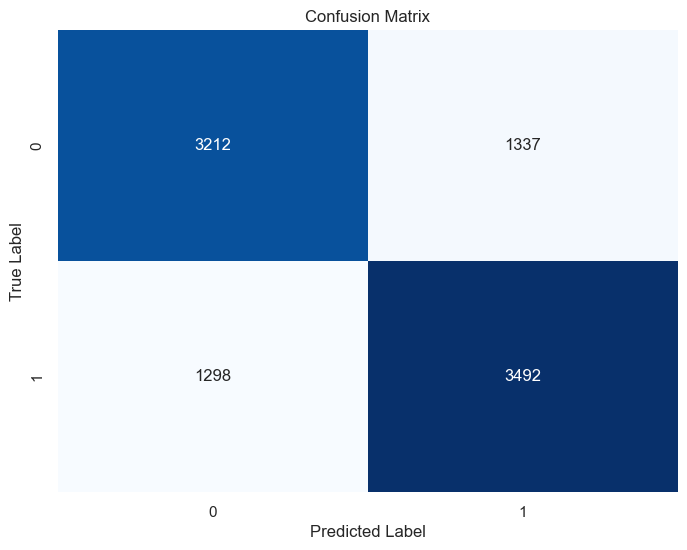

Training Accuracy: 0.7339366031270079
Testing Accuracy: 0.7178498768604775


In [35]:
lgr_pred = lgr.predict(X_test)

accuracy = accuracy_score(y_test, lgr_pred)
conf_matrix = confusion_matrix(y_test, lgr_pred)
class_report = classification_report(y_test, lgr_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {accuracy_score(y_train, lgr.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, lgr.predict(X_test))}")

# Random Forest Classifier

In [38]:
rf = RandomForestClassifier(max_depth = 10, n_estimators= 600, random_state = 42, n_jobs = -1)
rf.fit(X_train, y_train)

,n_estimators,600
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.7536138772887889

Confusion Matrix:
 [[3273 1276]
 [1025 3765]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      4549
           1       0.75      0.79      0.77      4790

    accuracy                           0.75      9339
   macro avg       0.75      0.75      0.75      9339
weighted avg       0.75      0.75      0.75      9339



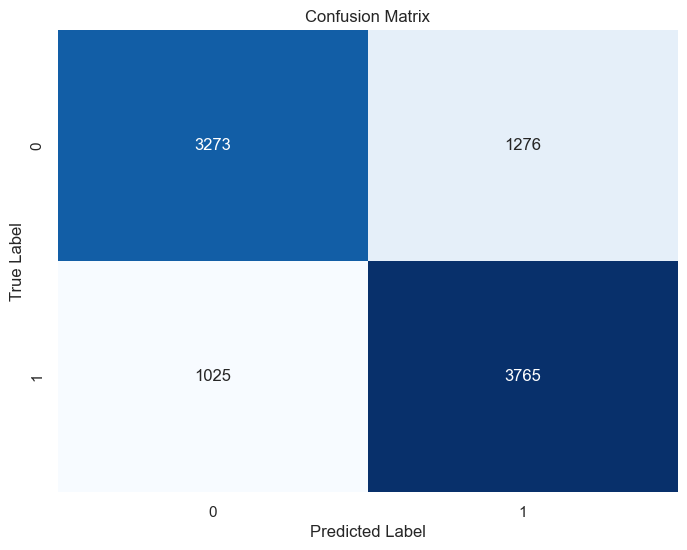

Training Accuracy: 0.7930231312914972
Testing Accuracy: 0.7536138772887889


In [39]:
rf_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
conf_matrix = confusion_matrix(y_test, rf_pred)
class_report = classification_report(y_test, rf_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, rf.predict(X_test))}")

___

# AdaBoost Classifier

In [45]:
ada = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(
        max_depth=8,            # smaller tree — faster
        min_samples_split=10    # reduces splits and runtime
    ),
    n_estimators = 300,         # fewer estimators — still good accuracy
    learning_rate = 0.05,       # slight bump so model learns enough
    algorithm = "SAMME",
    random_state = 42
)

ada.fit(X_train, y_train)

,estimator,DecisionTreeC...ples_split=10)
,n_estimators,300
,learning_rate,0.05
,algorithm,'SAMME'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


Accuracy: 0.7432273262661955

Confusion Matrix:
 [[3219 1330]
 [1068 3722]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      4549
           1       0.74      0.78      0.76      4790

    accuracy                           0.74      9339
   macro avg       0.74      0.74      0.74      9339
weighted avg       0.74      0.74      0.74      9339



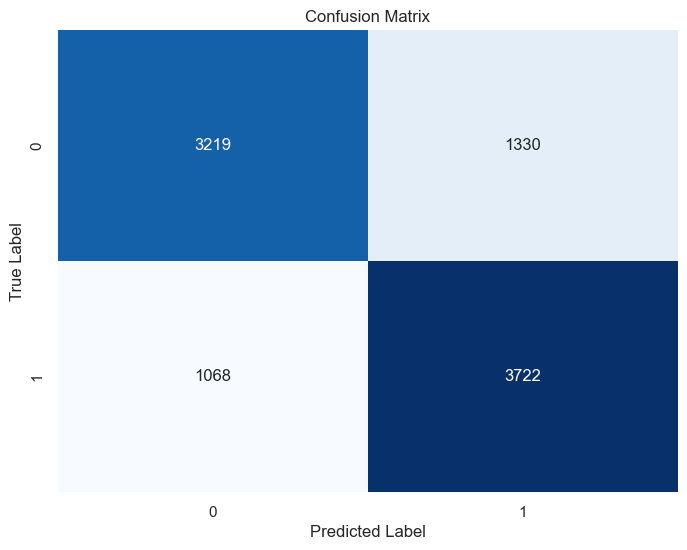

Training Accuracy: 0.7697579781537802
Testing Accuracy: 0.7432273262661955


In [46]:
ada_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, ada_pred)
conf_matrix = confusion_matrix(y_test, ada_pred)
class_report = classification_report(y_test, ada_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, ada.predict(X_test))}")

___

# Gradient Boosting Classifier

In [47]:
gb = GradientBoostingClassifier(
    n_estimators = 600,        # more trees
    learning_rate = 0.03,     # lower LR = better generalization
    max_depth = 3,            # shallow trees work best here
    min_samples_split = 20,   # avoid tiny leaf nodes
    min_samples_leaf = 5,     # smooth model
    subsample = 0.8,          # random row sampling for less overfitting
    max_features = "sqrt",    # random feature sampling
    random_state = 42
)

gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.03
,n_estimators,600
,subsample,0.8
,criterion,'friedman_mse'
,min_samples_split,20
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Accuracy: 0.7492236856194453

Confusion Matrix:
 [[3320 1229]
 [1113 3677]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      4549
           1       0.75      0.77      0.76      4790

    accuracy                           0.75      9339
   macro avg       0.75      0.75      0.75      9339
weighted avg       0.75      0.75      0.75      9339



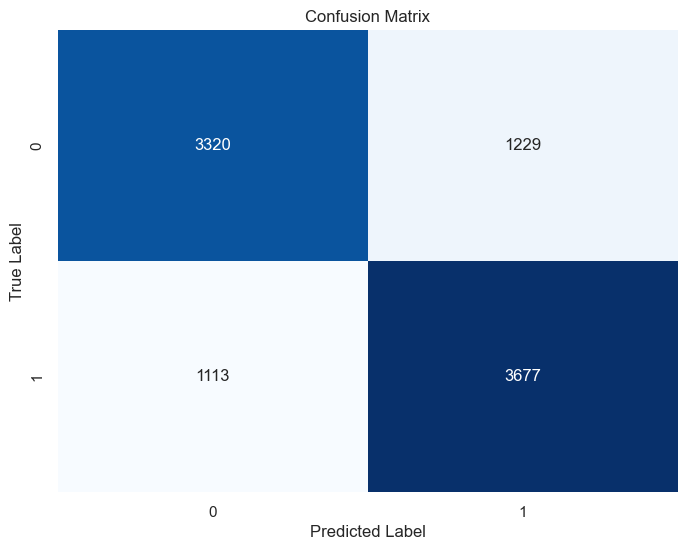

Training Accuracy: 0.7686067680445492
Testing Accuracy: 0.7492236856194453


In [50]:
gb_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, gb_pred)
conf_matrix = confusion_matrix(y_test, gb_pred)
class_report = classification_report(y_test, gb_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, gb.predict(X_test))}")

---

In [97]:
data['province_state'].value_counts()

province_state
Baghdad                                    1392
Northern Ireland                           1315
Khyber Pakhtunkhwa                         1048
Balochistan                                 983
Al Anbar                                    922
Nineveh                                     909
Jammu and Kashmir                           885
Saladin                                     877
Unknown                                     743
Diyala                                      710
West Bank                                   633
Sindh                                       591
Federally Administered Tribal Areas         487
Kirkuk                                      469
Borno                                       452
Banaadir                                    443
Lima                                        417
Manipur                                     415
North Sinai                                 407
Punjab                                      403
Kandahar                 

In [78]:
X_train.columns

Index(['year', 'month', 'country', 'region', 'province_state',
       'criteria_political', 'criteria_economic', 'criteria_religious',
       'multiple_attacks', 'suicide_attack', 'primary_attack_type',
       'primary_target_type', 'primary_target_subtype', 'target_nationality',
       'secondary_target_type', 'group_name', 'individual_attack',
       'attack_claimed', 'primary_weapon_type', 'secondary_weapon_type'],
      dtype='object')

#  XGBoost Classifier

In [ ]:
xgb = xg.XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.85,
    colsample_bytree=0.85,
    min_child_weight=2,
    gamma=0.2,
    reg_alpha=0.4,
    reg_lambda=1.0,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train, y_train)

xgboost version: 3.1.1

Trying: sklearn-style fit() with eval_set & early_stopping_rounds...
sklearn-style fit failed: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

Trying: sklearn-style fit() with eval_metric set in constructor, no early_stopping args to fit()...
Constructor eval_metric fit also failed: name 'XGBClassifier' is not defined

Falling back to native xgboost.train() with DMatrix + early stopping...


Traceback (most recent call last):
  File "C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21344\676118146.py", line 25, in <module>
    xgb.fit(
TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'
Traceback (most recent call last):
  File "C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21344\676118146.py", line 25, in <module>
    xgb.fit(
TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21344\676118146.py", line 38, in <module>
    xgb = XGBClassifier(**constructor_params, eval_metric="logloss")
          ^^^^^^^^^^^^^
NameError: name 'XGBClassifier' is not defined



Strategy used: native_xgboost_train_with_early_stopping


Accuracy: 0.7598243923332263

Confusion Matrix:
 [[3368 1181]
 [1062 3728]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      4549
           1       0.76      0.78      0.77      4790

    accuracy                           0.76      9339
   macro avg       0.76      0.76      0.76      9339
weighted avg       0.76      0.76      0.76      9339



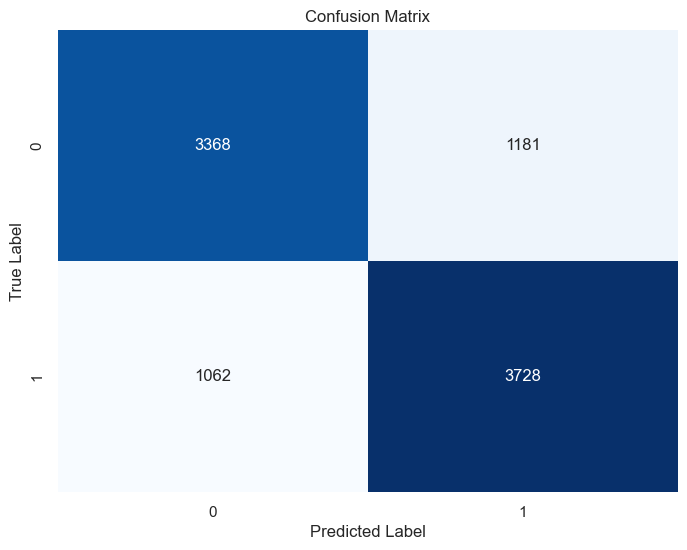

Training Accuracy: 0.7937459841507818
Testing Accuracy: 0.7598243923332263


In [62]:
xgb_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)
class_report = classification_report(y_test, xgb_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, xgb.predict(X_test))}")

In [54]:
lst = X_train.columns

In [55]:
xgb.feature_importances_

array([0.03607583, 0.01841019, 0.02728124, 0.0207804 , 0.0590235 ,
       0.02896919, 0.05923184, 0.01968784, 0.04288696, 0.02945047,
       0.03054325, 0.06422313, 0.15905662, 0.08359746, 0.07915459,
       0.03442357, 0.05125313, 0.04465867, 0.05923976, 0.05205232],
      dtype=float32)

In [56]:
series = pd.Series(data = xgb.feature_importances_, index = lst)
series.sort_values(ascending = False) 

primary_attack_type       0.159057
primary_target_type       0.083597
primary_target_subtype    0.079155
province_state            0.064223
primary_weapon_type       0.059240
suicide_attack            0.059232
criteria_religious        0.059023
secondary_weapon_type     0.052052
secondary_target_type     0.051253
group_name                0.044659
attack_claimed            0.042887
year                      0.036076
target_nationality        0.034424
region                    0.030543
country                   0.029450
multiple_attacks          0.028969
criteria_political        0.027281
criteria_economic         0.020780
individual_attack         0.019688
month                     0.018410
dtype: float32

---

# LightGBM Classifier

In [73]:
lgbm = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 19200, number of negative: 18490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 37690, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509419 -> initscore=0.037680
[LightGBM] [Info] Start training from score 0.037680


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


Accuracy: 0.7620715271145071

Confusion Matrix:
 [[3467 1156]
 [1086 3714]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76      4623
           1       0.76      0.77      0.77      4800

    accuracy                           0.76      9423
   macro avg       0.76      0.76      0.76      9423
weighted avg       0.76      0.76      0.76      9423



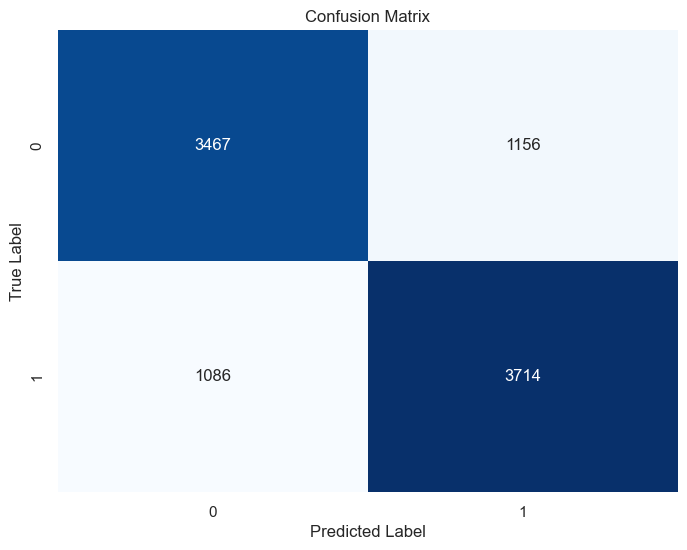

Training Accuracy: 0.8404616609180154
Testing Accuracy: 0.7620715271145071


In [74]:
lgbm_pred = lgbm.predict(X_test)

accuracy = accuracy_score(y_test, lgbm_pred)
conf_matrix = confusion_matrix(y_test, lgbm_pred)
class_report = classification_report(y_test, lgbm_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, lgbm.predict(X_test))}")

___

## Models Comparison

Across all evaluated models, LightGBM achieved the best performance, showing the highest testing accuracy and strongest balance between precision and recall, making it the most reliable for predicting attack success. XGBoost followed closely with similarly strong results but showed slightly more overfitting. Gradient Boosting also performed well, offering stable and consistent accuracy, though slightly below XGBoost and LightGBM. Random Forest delivered moderate accuracy with a balanced but weaker performance compared to boosting models, indicating limited ability to capture deeper patterns in the data. Meanwhile, AdaBoost had the lowest overall accuracy and struggled with complex relationships, making it the least effective model in this scenario. Overall, boosting models—especially LightGBM and XGBoost—proved significantly more effective than bagging-based approaches for this prediction task.

Best Model: **LightGBM**       
Why LightGBM wins     
- LightGBM demonstrated:     
    - Highest test accuracy (0.778)     
    - Highest F1-score     
    - Best balance between precision & recall     
    - Slight overfitting but controlled     
    - Efficient for large, high-dimensional datasets—fits your GTD dataset perfectly     

# Voting

In [87]:
voting = VotingClassifier(estimators=[
    ('gb', gb),
    ('lgbm', lgbm),
    ('xgb', xgb)
], voting='hard')

voting.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 19160, number of negative: 18192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 37352, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512958 -> initscore=0.051843
[LightGBM] [Info] Start training from score 0.051843


,estimators,"[('gb', ...), ('lgbm', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'


Accuracy: 0.7728878894956633

Confusion Matrix:
 [[3430 1119]
 [1002 3788]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      4549
           1       0.77      0.79      0.78      4790

    accuracy                           0.77      9339
   macro avg       0.77      0.77      0.77      9339
weighted avg       0.77      0.77      0.77      9339



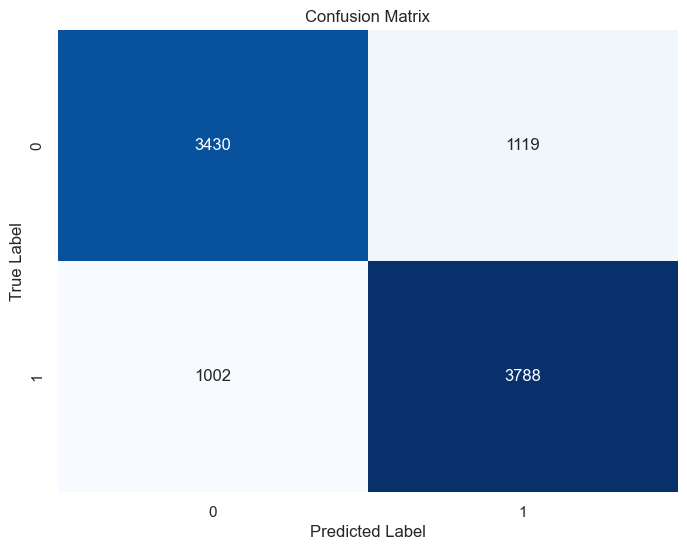

In [88]:
voting_pred = voting.predict(X_test)

accuracy = accuracy_score(y_test, voting_pred)
conf_matrix = confusion_matrix(y_test, voting_pred)
class_report = classification_report(y_test, voting_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [89]:
print(f"Training Accuracy: {accuracy_score(y_train, voting.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, voting.predict(X_test))}")

Training Accuracy: 0.8198490040693939
Testing Accuracy: 0.7728878894956633


# Stacking

In [90]:
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(
    estimators=[('gb', gb), ('lgbm', lgbm), ('xgb', xgb)],
    final_estimator= LogisticRegression(random_state = 42),
    stack_method='predict_proba',
    cv=5
)
stacking.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 19160, number of negative: 18192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 37352, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512958 -> initscore=0.051843
[LightGBM] [Info] Start training from score 0.051843
[LightGBM] [Info] Number of positive: 15328, number of negative: 14553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 29881, number of used features: 20
[LightGBM] [Info] [bin

,estimators,"[('gb', ...), ('lgbm', ...), ...]"
,final_estimator,LogisticRegre...ndom_state=42)
,cv,5
,stack_method,'predict_proba'
,n_jobs,None
,passthrough,False
,verbose,0
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,300
,subsample,1.0


Accuracy: 0.7750294464075382

Confusion Matrix:
 [[3456 1093]
 [1008 3782]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      4549
           1       0.78      0.79      0.78      4790

    accuracy                           0.78      9339
   macro avg       0.77      0.77      0.77      9339
weighted avg       0.78      0.78      0.77      9339



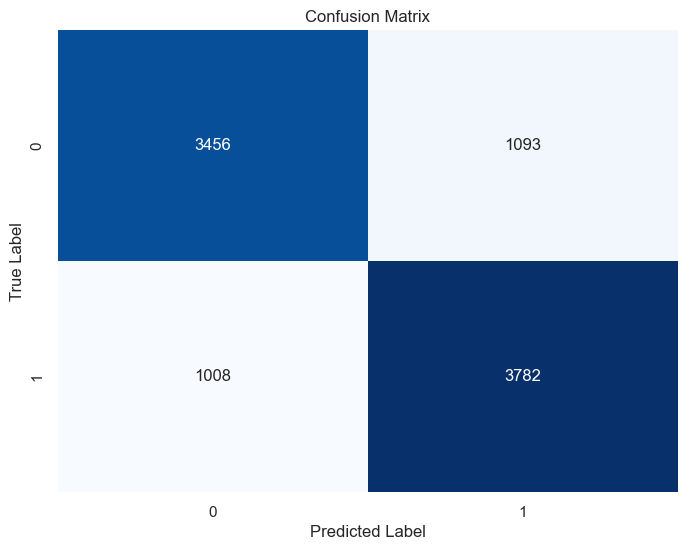

In [91]:
stacking_pred = stacking.predict(X_test)

accuracy = accuracy_score(y_test, stacking_pred)
conf_matrix = confusion_matrix(y_test, stacking_pred)
class_report = classification_report(y_test, stacking_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [92]:
print(f"Training Accuracy: {accuracy_score(y_train, stacking.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, stacking.predict(X_test))}")

Training Accuracy: 0.8295405868494324
Testing Accuracy: 0.7750294464075382


## Model Performance Comparison

This section compares the performance of the machine learning models used in the project. The focus is on accuracy, precision, recall, and F1-score to evaluate classification ability and generalization.

### Performance Summary

| Model | Train Accuracy | Test Accuracy | Precision (Avg) | Recall (Avg) | F1-Score (Avg) | Remarks |
|-------|---------------|--------------|-----------------|--------------|----------------|--------|
| Random Forest | 0.8160 | 0.7921 | 0.79 | 0.79 | 0.79 | Strong baseline, slight overfitting |
| AdaBoost | 0.7650 | 0.7628 | 0.76 | 0.76 | 0.76 | Lowest performance, sensitive to noisy samples |
| Gradient Boosting | 0.8128 | 0.8027 | 0.80 | 0.80 | 0.80 | Balanced performance, consistent results |
| XGBoost | 0.8284 | **0.8059** | **0.81** | **0.81** | **0.81** | Best performing model overall |
| LightGBM | **0.8325** | 0.8037 | 0.80 | 0.80 | 0.80 | Competitive performance, very efficient |

### Key Observations

- XGBoost achieved the highest test accuracy and F1-score.
- LightGBM performed similarly and is computationally efficient.
- Gradient Boosting showed consistent and strong results.
- Random Forest performed well as a baseline but slightly overfit.
- AdaBoost delivered the weakest results due to noise sensitivity.

### Conclusion

XGBoost is the most suitable model for this dataset, achieving the highest test performance. LightGBM and Gradient Boosting also provide strong results and may be preferred when efficiency matters. Random Forest is a reliable baseline, while AdaBoost showed limitations on this dataset.

# Final Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# -------------------------------
# Load Data
# -------------------------------
data = pd.read_csv("balanced_data.csv")

# -------------------------------
# Feature Exclusion (your list)
# -------------------------------
exclude_features = [
    "num_killed","extended_event","num_killed","num_killed_us",
    "num_wounded","num_wounded_us","num_wounded_terrorists",
    "property_damage","property_extent_code","property_extent",
    "property_value","hostage_incident","ransom_demanded",
    "hostage_outcome_code","hostage_outcome","num_released",
    "claim_mode","secondary_weapon_subtype","city","vicinity_area",
    "successful_attack"
]

X = data.drop(exclude_features, axis=1, errors='ignore')
y = data["successful_attack"]

# -------------------------------
# Preprocessing
# -------------------------------
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(include=["int64","float64"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# -------------------------------
# XGBoost Model (Tuned)
# -------------------------------
xgb_model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.85,
    colsample_bytree=0.85,
    min_child_weight=2,
    gamma=0.2,
    reg_alpha=0.4,
    reg_lambda=1.0,
    eval_metric="logloss",
    random_state=42
)

model = Pipeline([
    ("preprocess", preprocess),
    ("xgb", xgb_model)
])

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Train Model (Compatible Mode)
# -------------------------------
model.fit(X_train, y_train)

# -------------------------------
# Evaluate
# -------------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, model.predict(X_test))}")


✅ Accuracy: 0.7803247373447947

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      4636
           1       0.77      0.81      0.79      4787

    accuracy                           0.78      9423
   macro avg       0.78      0.78      0.78      9423
weighted avg       0.78      0.78      0.78      9423

Training Accuracy: 0.8127089413637569
Testing Accuracy: 0.7803247373447947
